# Create an algorithm to detect North Atlantic right whale calls from audio recordings, prevent collisions with shipping traffic

We depend on shipping industry's uninterrupted ability to transport goods across long distances. Navigation technologies combine accurate position and environmental data to calculate optimal transport routes. Accounting for and reducing the impact of commercial shipping on the ocean’s environment, while achieving commercial sustainability, is of increasing importance, especially as it relates to the influence of cumulative noise “footprints” on the great whales.

Marinexplore is organizing the Planet's ocean data with the leading community of ocean professionals. One of the important datasets consists of acoustic recordings that can be used to detect species inhabiting the global ocean. Knowledge about animal locations can be utilized in industrial operations.

Cornell University's Bioacoustic Research Program has extensive experience in identifying endangered whale species and has deployed a 24/7 buoy network to guide ships from colliding with the world's last 400 North Atlantic right whales.

![title](img/whalepic.png)


Right whales make a half-dozen types of sounds, but the characteristic up-call is the one identified by the auto-detection buoys. The up-call is useful because it’s distinctive and right whales give it often. A type of “contact call,” the up-call is a little like small talk--the sound of a right whale going about its day and letting others know it’s nearby. In this recording the up-call is easy to hear--a deep, rising “whoop” that lasts about a second:
Marinexplore and Cornell researchers challenge YOU to beat the existing whale detection algorithm identifying the right whale calls. This will advance ship routing decisions in the region.

### Packages

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import aifc
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None 

In [2]:
def nextpow2(x):
    ''' 
    calculate the next power of 2 of x
    '''
    return (x-1).bit_length()

## Data

In [3]:
# training data
fp = '/Users/KRich/GitHub/data/whale/data/'
trainData = pd.read_csv(fp + 'train.csv')
# for exploring purposes, lets id the
# indices in trainData that contain a whale call:

#iWhaleCall = [i for i, x in enumerate(trainData.label) if x == 1]
#iNoWhaleCall = [i for i, x in enumerate(trainData.label) if x == 0]

iWhaleCall = []
iNoWhaleCall = []
for i in range(len(trainData)):
    val = trainData.label[i]
    if val == 1:
        iWhaleCall.append(i)
    elif val == 0:
        iNoWhaleCall.append(i)


# total number of audio clips
print(str(len(iWhaleCall)) + ' out of '+ str(len(trainData.label)) + ' audio clips are whale calls')

7027 out of 30000 audio clips are whale calls


## Example data
Lets start off by looking at some sample data: look at time-domain and spectra/spectrograms of single trials

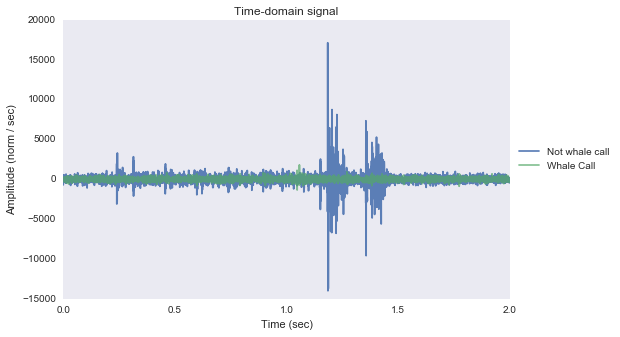

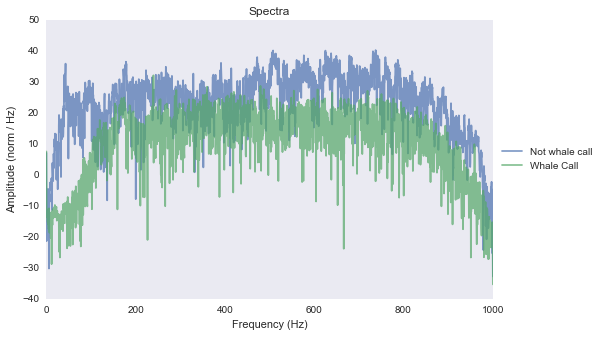

In [4]:
from scipy import signal
clips = list(trainData.clip_name)
# =========================================
# pick a trial number 1--7026  
TrialNumber =  200


# =========================================
# data ====================================
# data file names for example data
posFN =  fp+'train/train'+str(iWhaleCall[TrialNumber])+'.aiff'
negFN =  fp+'train/train'+str(iNoWhaleCall[TrialNumber])+'.aiff'
# open data files and sort
#whale call:
posSig = aifc.open(posFN, 'r')
posStrSig = posSig.readframes(posSig.getnframes())
pos_y = np.fromstring(posStrSig,np.short).byteswap()
# not whale call:
negSig = aifc.open(negFN, 'r')
negStrSig = negSig.readframes(negSig.getnframes())
neg_y = np.fromstring(negStrSig,np.short).byteswap()
# =========================================
# Parameters
# frame rate
fs = posSig.getframerate()
# number of frames
N = posSig.getnframes()
Nzero = 2**nextpow2(len(pos_y));
# values
ts = 1.0/fs
t = np.arange(0,2,ts)
freq  = np.linspace(0,fs,Nzero) # freq vec for non-zero pad signal

# =========================================
# PLOT Time-domain ========================
plt.figure
plt.figure(figsize = (8,5))
plt.plot(t,neg_y, alpha=.9, label = 'Not whale call')
plt.plot(t,pos_y, alpha=.7, label = 'Whale Call')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.ylabel('Amplitude (norm / sec)')
plt.xlabel('Time (sec)')
plt.title('Time-domain signal')

# PLOT SPECTRA ============================================
# fft of positive signal---------------
pos_Y = np.fft.fft(pos_y, Nzero) # fft of y 
pos_Y = np.abs(pos_Y)*2/len(pos_Y)  # square the abs value of Y
# fft of negative signal---------------
neg_Y = np.fft.fft(neg_y, Nzero) # fft of y 
neg_Y = np.abs(neg_Y)*2/len(neg_Y)  # square the abs value of Y
#-----------------------------------------------------
plt.figure
plt.figure(figsize = (8,5))
plt.plot(freq, 20*np.log10(neg_Y), alpha=.7, label = 'Not whale call')
plt.plot(freq, 20*np.log10(pos_Y), alpha=.7, label = 'Whale Call')
plt.ylabel('Amplitude (norm / Hz)')
plt.xlabel('Frequency (Hz)')
plt.title('Spectra')
plt.xlim([0,fs/2])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()


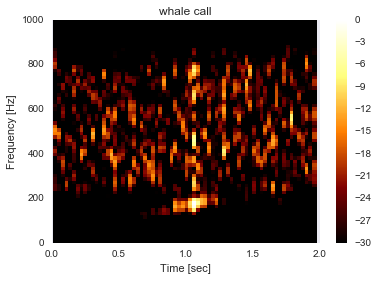

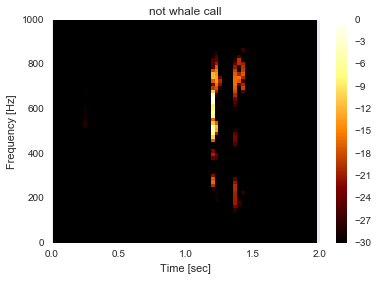

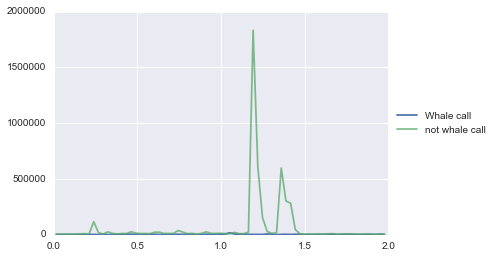

In [104]:
from scipy import signal
pos_y = signal.detrend(pos_y)
neg_y = signal.detrend(neg_y)
# whale call -------------------------
f, t, Sxx_pos1 = signal.spectrogram(pos_y, fs, nfft = 128, window = 'hamm',
                                   nperseg = 64, 
                                   detrend = 'constant', scaling = 'density')
Sxx_pos = 20*np.log10(Sxx_pos1/Sxx_pos1.max())
#Sxx_pos[Sxx_pos < -20] = -20

# not whale call -------------------------
f, t, Sxx_neg1 = signal.spectrogram(neg_y, fs, nfft = 128, window = 'hamm',  
                                   nperseg = 64,  
                                   detrend = 'constant', scaling = 'density')
Sxx_neg = 20*np.log10(Sxx_neg1/Sxx_neg1.max())
#Sxx_neg[Sxx_neg < -20] = -20

plt.pcolormesh(t, f, Sxx_pos, cmap = 'afmhot',vmin=-30, vmax=0)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('whale call')
plt.colorbar()
plt.show()


plt.pcolormesh(t, f, Sxx_neg, cmap = 'afmhot',vmin=-30, vmax=0)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('not whale call')
plt.colorbar()
plt.show()

plt.figure()
plt.plot(t,sum(Sxx_pos1),label ='Whale call')
plt.plot(t,sum(Sxx_neg1),alpha=0.75,label ='not whale call')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## average of time-domain signals in train data

In [94]:
# data frame
whale_df = pd.read_csv(fp + 'train.csv')
test_df = pd.read_csv(fp + 'test.csv')
whale_df.head()


,clip_name,label
0,train1.aiff,0
1,train2.aiff,0
2,train3.aiff,0
3,train4.aiff,0
4,train5.aiff,0


In [95]:
# whale calls ------------
pos_ysum = 0
for i in range(len(iWhaleCall)):
    posFNsum  =  'data/train/train'+str(iWhaleCall[i])+'.aiff'
    posSigsum = aifc.open(posFNsum, 'r')
    posStrSigsum = posSigsum.readframes(posSigsum.getnframes())
    pos_ytemp    = np.fromstring(posStrSigsum,np.short).byteswap()
    pos_ysum     = pos_ytemp + pos_ysum
# not whale calls ------------
neg_ysum = 0
for i in range(len(iNoWhaleCall)):
    negFNsum  =  'data/train/train'+str(iNoWhaleCall[i])+'.aiff'
    negSigsum = aifc.open(posFNsum, 'r')
    negStrSigsum = negSigsum.readframes(negSigsum.getnframes())
    neg_ytemp    = np.fromstring(negStrSigsum,np.short).byteswap()
    neg_ysum     = neg_ytemp + neg_ysum
    
pos_yAvg = pos_ysum/len(iWhaleCall)
neg_yAvg = neg_ysum/len(iNoWhaleCall)

plt.figure()
plt.plot(t,pos_yAvg)
plt.plot(t,neg_yAvg)

FileNotFoundError: [Errno 2] No such file or directory: 'data/train/train5.aiff'

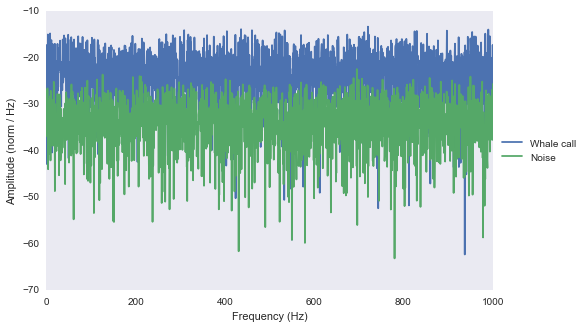

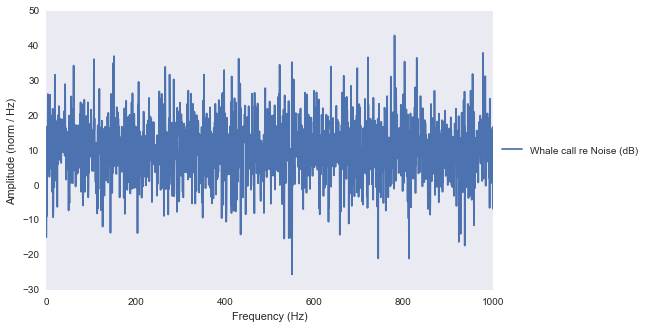

In [210]:
#-----------------------------------------------------
# fft of positive signal---------------
pos_Y = np.fft.fft(pos_yAvg, 2**nextpow2(len(pos_y))) # fft of y 
pos_Y = np.abs(pos_Y)*2/len(pos_Y)  # square the abs value of Y
# fft of negative signal---------------
neg_Y = np.fft.fft(neg_yAvg, 2**nextpow2(len(neg_y))) # fft of y 
neg_Y = np.abs(neg_Y)*2/len(neg_Y)  # square the abs value of Y
#-----------------------------------------------------
freq  = np.linspace(0,fs,len(pos_Y)) # freq vec for non-zero pad signal
#-----------------------------------------------------
# plot on log scale --------------------
plt.figure
plt.figure(figsize = (8,5))
plt.plot(freq, 20*np.log10(pos_Y), label = 'Whale call')
plt.plot(freq, 20*np.log10(neg_Y), label = 'Noise')
plt.ylabel('Amplitude (norm / Hz)')
plt.xlabel('Frequency (Hz)')
plt.title('  ')
plt.xlim([0,fs/2])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

plt.figure
plt.figure(figsize = (8,5))
plt.plot(freq, 20*np.log10(pos_Y/neg_Y), label = 'Whale call re Noise (dB)')
plt.ylabel('Amplitude (norm / Hz)')
plt.xlabel('Frequency (Hz)')
plt.title('  ')
plt.xlim([0,fs/2])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

## Time-domain signal

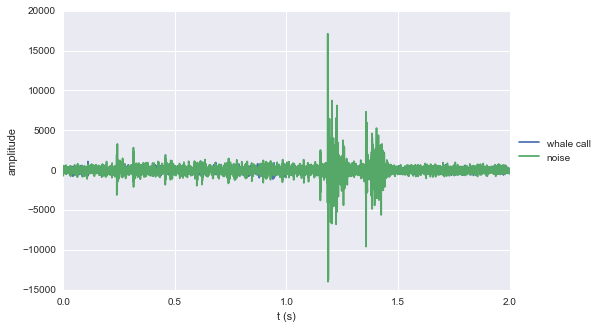

In [205]:
plt.figure
plt.figure(figsize = (8,5))
plt.plot(t, pos_y, label = 'whale call')
plt.plot(t, neg_y, label= 'noise')
plt.xlabel('t (s)')
plt.ylabel('amplitude')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



## frequency domain

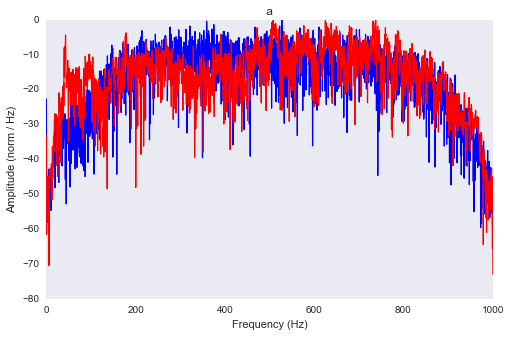

In [206]:
# function for calculating next power of 2 of val x (use for zero-padding)
def nextpow2(x):
    ''' 
    calculate the next power of 2 of x
    '''
    return (x-1).bit_length()

#-----------------------------------------------------
# fft of positive signal---------------
pos_Y = np.fft.fft(pos_y, 2**nextpow2(len(pos_y))) # fft of y 
pos_Y = np.abs(pos_Y)*2/len(pos_Y)  # square the abs value of Y
pos_Y = (pos_Y/max(pos_Y))          # normalize to max val
# fft of negative signal---------------
neg_Y = np.fft.fft(neg_y, 2**nextpow2(len(neg_y))) # fft of y 
neg_Y = np.abs(neg_Y)*2/len(neg_Y)  # square the abs value of Y
neg_Y = (neg_Y/max(neg_Y))          # normalize to max val
#-----------------------------------------------------
freq  = np.linspace(0,fs,len(pos_Y)) # freq vec for non-zero pad signal
#-----------------------------------------------------
# plot on log scale --------------------
plt.figure
plt.figure(figsize = (8,5))
plt.plot(freq, 20*np.log10(pos_Y), 'b-',linewidth=1.2)
plt.plot(freq, 20*np.log10(neg_Y), 'r-',linewidth=1.2)
plt.ylabel('Amplitude (norm / Hz)')
plt.xlabel('Frequency (Hz)')
plt.title(' a ')
plt.xlim([0,fs/2])
plt.grid()
plt.show()

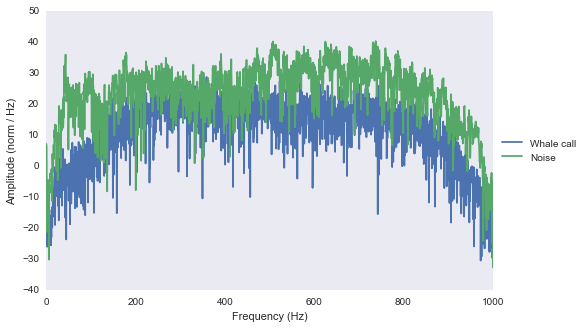

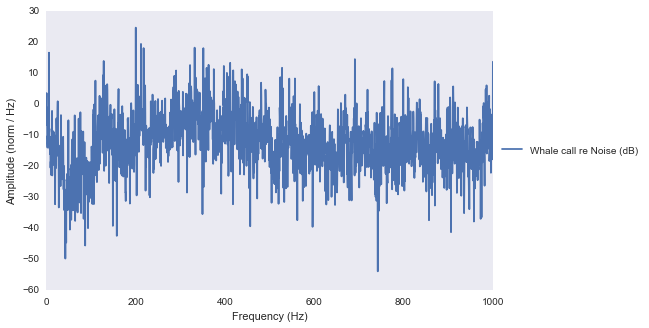

In [207]:
#-----------------------------------------------------
# fft of positive signal---------------
pos_Y = np.fft.fft(pos_y, 2**nextpow2(len(pos_y))) # fft of y 
pos_Y = np.abs(pos_Y)*2/len(pos_Y)  # square the abs value of Y
# fft of negative signal---------------
neg_Y = np.fft.fft(neg_y, 2**nextpow2(len(neg_y))) # fft of y 
neg_Y = np.abs(neg_Y)*2/len(neg_Y)  # square the abs value of Y
#-----------------------------------------------------
freq  = np.linspace(0,fs,len(pos_Y)) # freq vec for non-zero pad signal
#-----------------------------------------------------
# plot on log scale --------------------
plt.figure
plt.figure(figsize = (8,5))
plt.plot(freq, 20*np.log10(pos_Y), label = 'Whale call')
plt.plot(freq, 20*np.log10(neg_Y), label = 'Noise')
plt.ylabel('Amplitude (norm / Hz)')
plt.xlabel('Frequency (Hz)')
plt.title('  ')
plt.xlim([0,fs/2])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

plt.figure
plt.figure(figsize = (8,5))
plt.plot(freq, 20*np.log10(pos_Y/neg_Y), label = 'Whale call re Noise (dB)')
plt.ylabel('Amplitude (norm / Hz)')
plt.xlabel('Frequency (Hz)')
plt.title('  ')
plt.xlim([0,fs/2])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


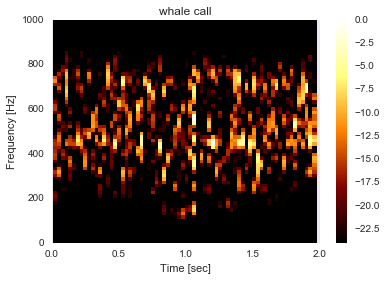

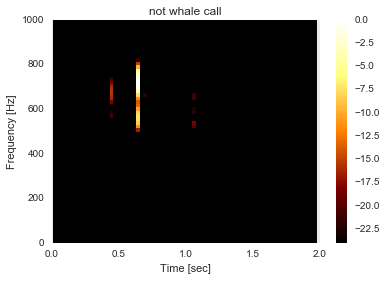

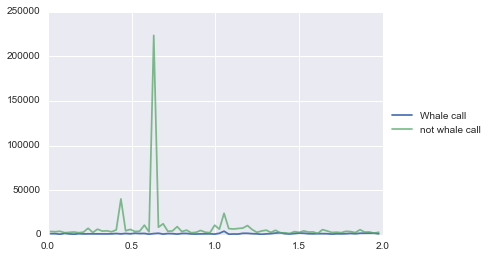

In [97]:
from scipy import signal
pos_y = signal.detrend(pos_y)
neg_y = signal.detrend(neg_y)
# whale call -------------------------
f, t, Sxx_pos1 = signal.spectrogram(pos_y, fs, nfft = 128, window = 'hamm',
                                   nperseg = 64, 
                                   detrend = 'constant', scaling = 'density')
Sxx_pos = 20*np.log10(Sxx_pos1/Sxx_pos1.max())
#Sxx_pos[Sxx_pos < -20] = -20

# not whale call -------------------------
f, t, Sxx_neg1 = signal.spectrogram(neg_y, fs, nfft = 128, window = 'hamm',  
                                   nperseg = 64,  
                                   detrend = 'constant', scaling = 'density')
Sxx_neg = 20*np.log10(Sxx_neg1/Sxx_neg1.max())
#Sxx_neg[Sxx_neg < -20] = -20

plt.pcolormesh(t, f, Sxx_pos, cmap = 'afmhot',vmin=-24, vmax=0)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('whale call')
plt.colorbar()
plt.show()


plt.pcolormesh(t, f, Sxx_neg, cmap = 'afmhot',vmin=-24, vmax=0)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('not whale call')
plt.colorbar()
plt.show()

plt.figure()
plt.plot(t,sum(Sxx_pos1),label ='Whale call')
plt.plot(t,sum(Sxx_neg1),alpha=0.75,label ='not whale call')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



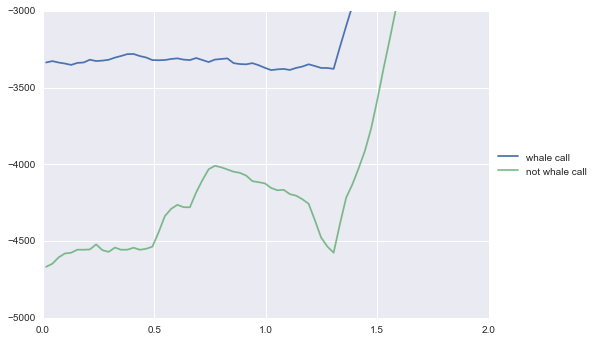

In [6]:
# running average
import numpy as np

def runningMean(x, N):
    y = np.zeros((len(x),))
    for ctr in range(len(x)):
         y[ctr] = np.sum(x[ctr:(ctr+N)])
    return y/N


val  = runningMean(sum(Sxx_pos),25)
val2 = runningMean(sum(Sxx_neg),25)

plt.figure()
plt.plot(t,val,label = 'whale call')
plt.plot(t,val2,alpha=0.75,label = 'not whale call')
plt.ylim([-5000, -3000])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [106]:
clips = list(trainData.clip_name)

# data file names for example data
posFN =  'data/train/train'+str(iWhaleCall[200])+'.aiff'
negFN =  'data/train/train'+str(iNoWhaleCall[300])+'.aiff'

# open data files and sort
posSig = aifc.open(posFN, 'r')
negSig = aifc.open(negFN, 'r')


posStrSig = posSig.readframes(posSig.getnframes())
pos_y = np.fromstring(posStrSig,np.short).byteswap()

negStrSig = negSig.readframes(negSig.getnframes())
neg_y = np.fromstring(negStrSig,np.short).byteswap()

# frame rate
fs = posSig.getframerate()

# number of frames
N = posSig.getnframes()

# values
ts = 1.0/fs
t = np.arange(0,2,ts)


from scipy import signal
pos_y = signal.detrend(pos_y)
neg_y = signal.detrend(neg_y)
# whale call -------------------------
f, t, Sxx_pos1 = signal.spectrogram(pos_y, fs, nfft = 128, window = 'hamm',
                                   nperseg = 64, 
                                   detrend = 'constant', scaling = 'density')
Sxx_pos = 20*np.log10(Sxx_pos1/Sxx_pos1.max())
#Sxx_pos[Sxx_pos < -20] = -20

# not whale call -------------------------
f, t, Sxx_neg1 = signal.spectrogram(neg_y, fs, nfft = 128, window = 'hamm',  
                                   nperseg = 64,  
                                   detrend = 'constant', scaling = 'density')
Sxx_neg = 20*np.log10(Sxx_neg1/Sxx_neg1.max())
#Sxx_neg[Sxx_neg < -20] = -20

plt.pcolormesh(t, f, Sxx_pos, cmap = 'afmhot',vmin=-24, vmax=0)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('whale call')
plt.colorbar()
#plt.ylim(0,500)
plt.show()


plt.pcolormesh(t, f, Sxx_neg, cmap = 'afmhot',vmin=-24, vmax=0)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('not whale call')
plt.colorbar()
plt.show()

plt.figure()
plt.plot(t,sum(Sxx_pos1),label ='Whale call')
plt.plot(t,sum(Sxx_neg1),alpha=0.75,label ='not whale call')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

len(Sxx_neg1[:,1])


FileNotFoundError: [Errno 2] No such file or directory: 'data/train/train2168.aiff'

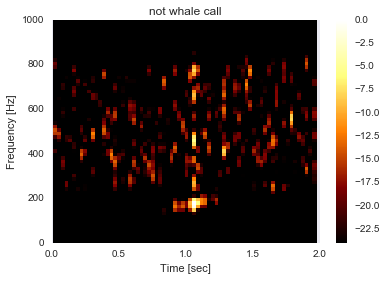

In [108]:
idx =np.where(f==406.25)[0]
idx

plt.pcolormesh(t, f, Sxx_neg, cmap = 'afmhot',vmin=-24, vmax=0)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('not whale call')
plt.colorbar()
plt.show()

In [308]:

yy=26
xx = f[:yy]
xx

idx

array([26])

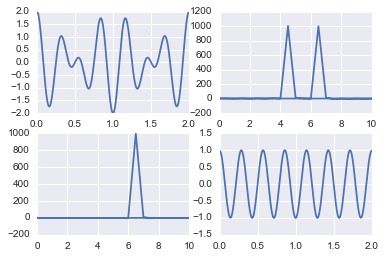

In [111]:
import numpy as np
from scipy.fftpack import rfft, irfft, fftfreq

time   = np.linspace(0,2,2000)
signal = np.cos(5*np.pi*time) + np.cos(7*np.pi*time)

W = fftfreq(signal.size, d=time[1]-time[0])
f_signal = rfft(signal)

# If our original signal time was in seconds, this is now in Hz    
cut_f_signal = f_signal.copy()
cut_f_signal[(W<6)] = 0

cut_signal = irfft(cut_f_signal)


import pylab as plt
plt.subplot(221)
plt.plot(time,signal)
plt.subplot(222)
plt.plot(W,f_signal)
plt.xlim(0,10)
plt.subplot(223)
plt.plot(W,cut_f_signal)
plt.xlim(0,10)
plt.subplot(224)
plt.plot(time,cut_signal)
plt.show()